In [1]:
# Data Handling
import pandas as pd
import numpy as np
import re

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import nltk

# Text Processing
from collections import Counter
from wordcloud import WordCloud

ImportError: DLL load failed while importing query_integral_image: An Application Control policy has blocked this file.

In [34]:
# Load the dataset
df = pd.read_csv("Fake_News_Detection.csv")

# Display basic information
print("Dataset Loaded.")
print(df.info())
print(df.head())


Dataset Loaded.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         23481 non-null  object 
 1   text          23481 non-null  object 
 2   subject       23481 non-null  object 
 3   date          23481 non-null  object 
 4   word_count    23481 non-null  int64  
 5   char_count    23481 non-null  int64  
 6   title_length  23481 non-null  int64  
 7   year          23471 non-null  float64
 8   month         23471 non-null  float64
 9   day           23471 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.8+ MB
None
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Fra

In [37]:
# Standardize the date format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Function to clean text
def clean_text(text):
    text = str(text)
    text = re.sub(r'[^a-zA-Z0-9.,!?\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply text cleaning
df['title'] = df['title'].apply(clean_text)
df['text'] = df['text'].apply(clean_text)

print("Data Cleaning Completed.")


Data Cleaning Completed.


In [39]:
print("Dataset Shape:", df.shape)
print("Column Summary:\n", df.describe(include='all'))
print("Missing Values:\n", df.isnull().sum())

Dataset Shape: (23481, 10)
Column Summary:
                                                     title   text subject  \
count                                               23481  23481   23481   
unique                                              17901  17449       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    630    9050   
mean                                                  NaN    NaN     NaN   
min                                                   NaN    NaN     NaN   
25%                                                   NaN    NaN     NaN   
50%                                                   NaN    NaN     NaN   
75%                                                   NaN    NaN     NaN   
max                                                   NaN    NaN     NaN   
std                                                   NaN    NaN     NaN   

                                 date    wo

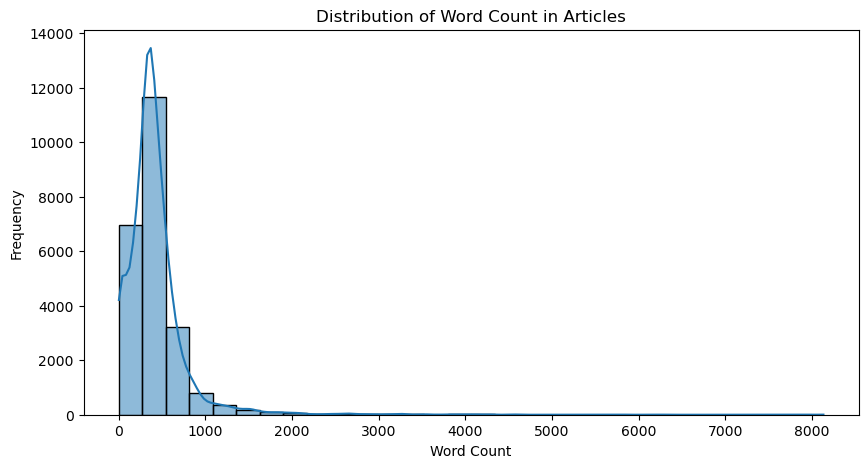

In [41]:
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Distribution of Word Count in Articles")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


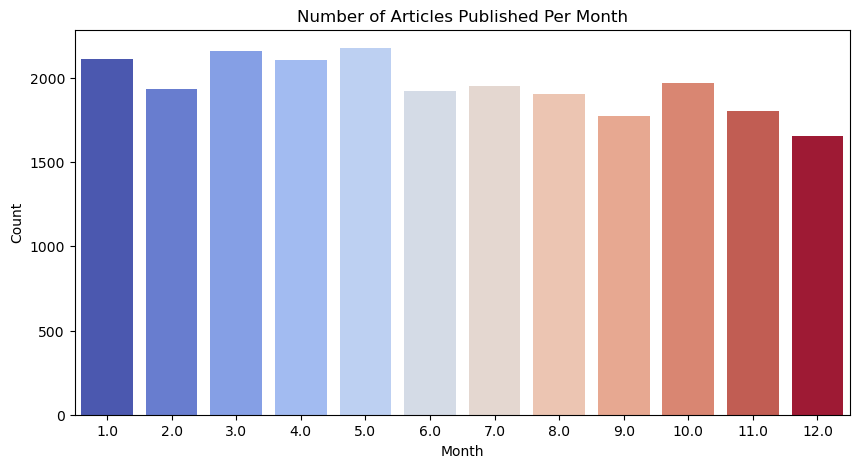

In [45]:
plt.figure(figsize=(10, 5))
sns.countplot(x='month', data=df, hue='month', palette='coolwarm', legend=False)  # Assign hue
plt.title("Number of Articles Published Per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


LOAD DATASET

In [ ]:
# Load the dataset
file_path = "Fake_News_Detection.csv"
df = pd.read_csv(file_path)

# Set seaborn style
sns.set(style="whitegrid")

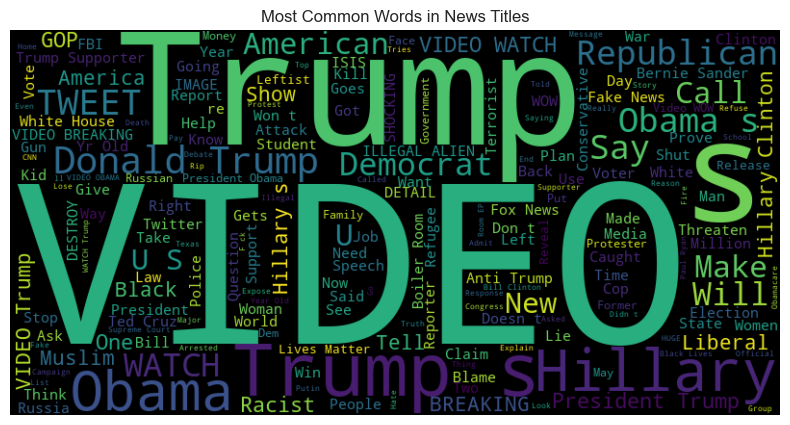

In [92]:
# 1. Word Cloud for Titles
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(' '.join(df['title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in News Titles")
plt.show()

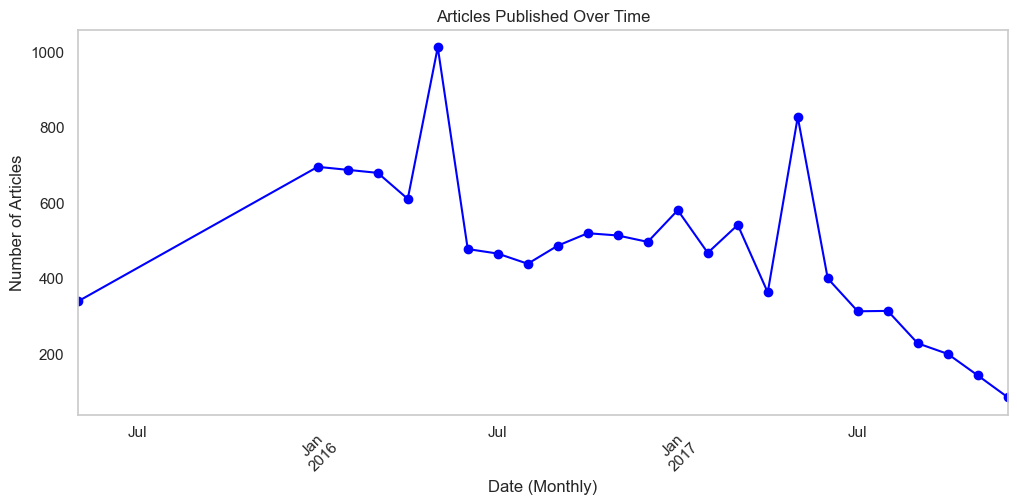

In [94]:
# 2. Time Series Analysis (Number of Articles Over Time)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_time = df.groupby(df['date'].dt.to_period("M")).size()
plt.figure(figsize=(12, 5))
df_time.plot(kind='line', marker='o', color='blue')
plt.xlabel("Date (Monthly)")
plt.ylabel("Number of Articles")
plt.title("Articles Published Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

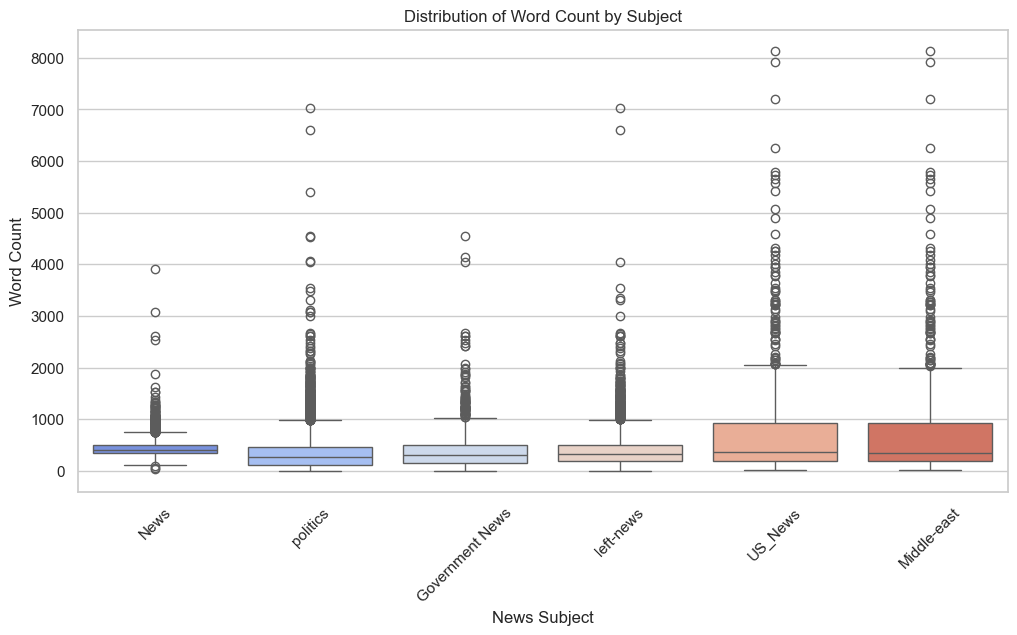

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='subject', y='word_count', hue='subject', palette='coolwarm', legend=False)
plt.xticks(rotation=45)
plt.xlabel("News Subject")
plt.ylabel("Word Count")
plt.title("Distribution of Word Count by Subject")
plt.show()

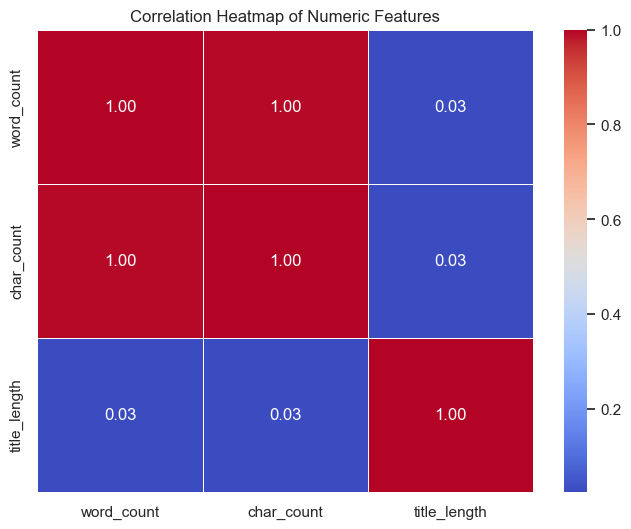

In [98]:
# 4. Heatmap of Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df[['word_count', 'char_count', 'title_length']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

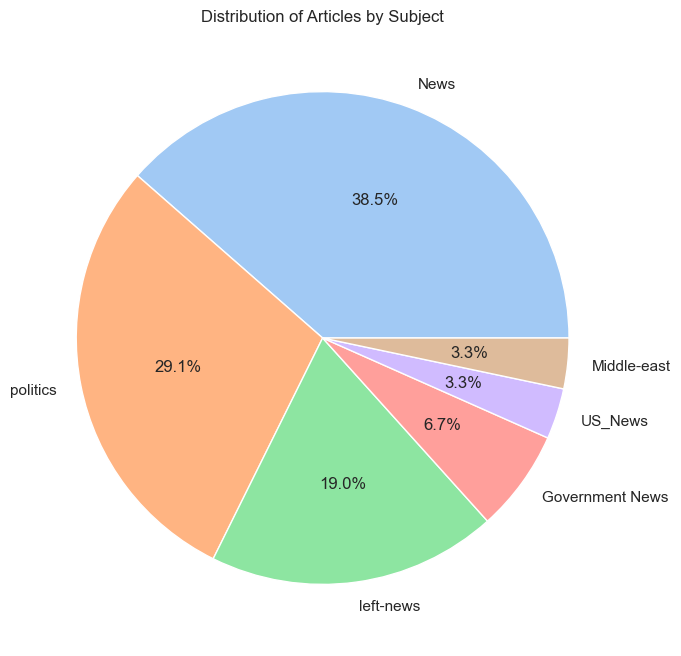

In [102]:
# 5. Pie Chart of Articles by Subject
plt.figure(figsize=(8, 8))
df['subject'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Distribution of Articles by Subject")
plt.ylabel("")  # Hide y-label
plt.show()

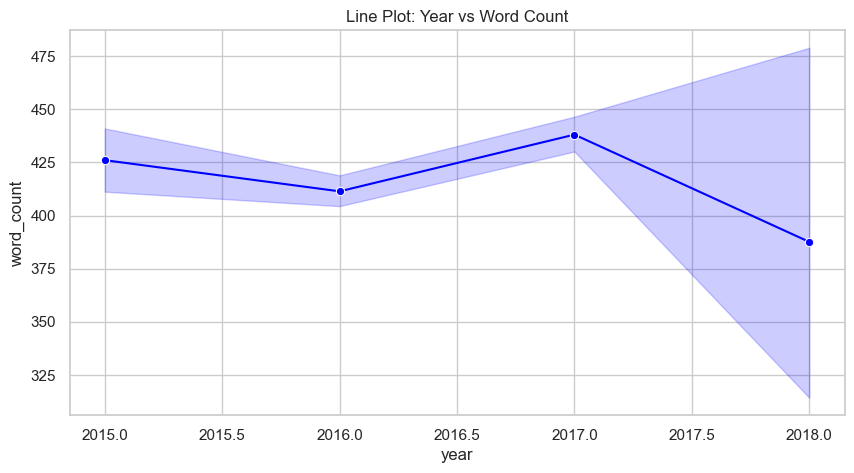

In [106]:
# 6. Seaborn Data Visualization (as per Program 11)

# Line Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='year', y='word_count', marker='o', color='blue')
plt.title("Line Plot: Year vs Word Count")
plt.show()


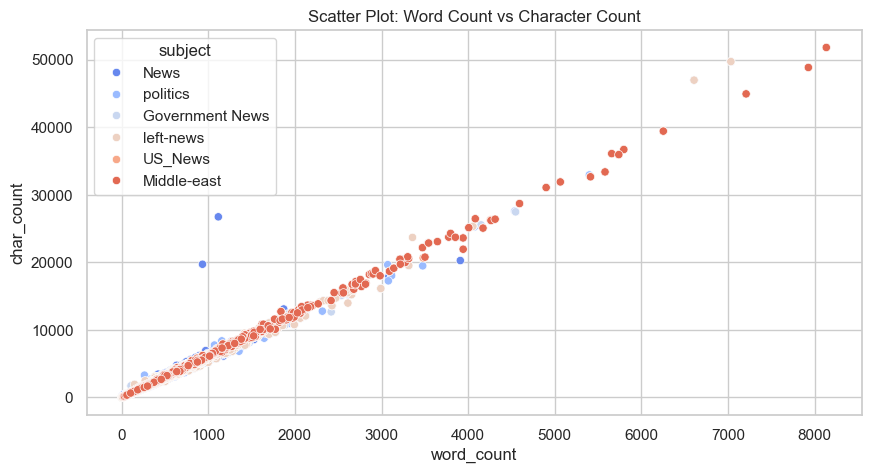

In [108]:
# Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='word_count', y='char_count', hue='subject', palette='coolwarm')
plt.title("Scatter Plot: Word Count vs Character Count")
plt.show()

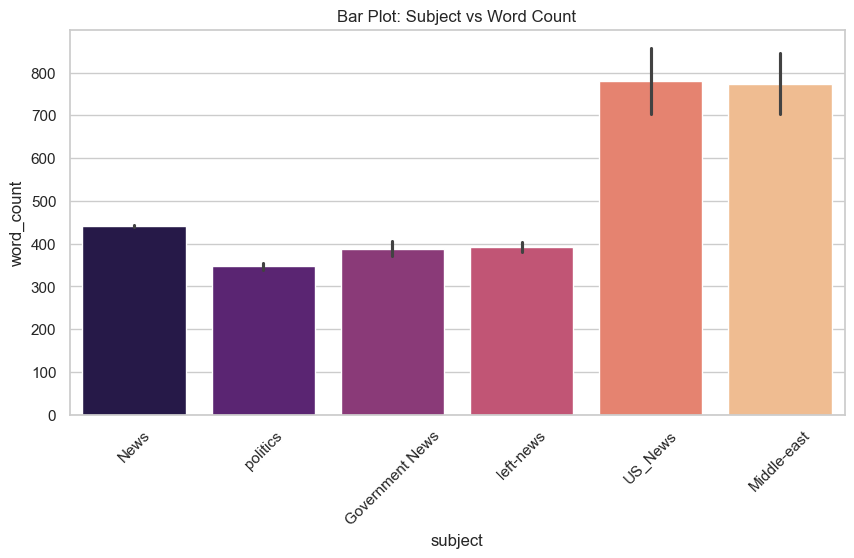

In [112]:
# Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='subject', y='word_count', hue='subject', palette='magma', dodge=False)
plt.xticks(rotation=45)
plt.title("Bar Plot: Subject vs Word Count")
plt.show()

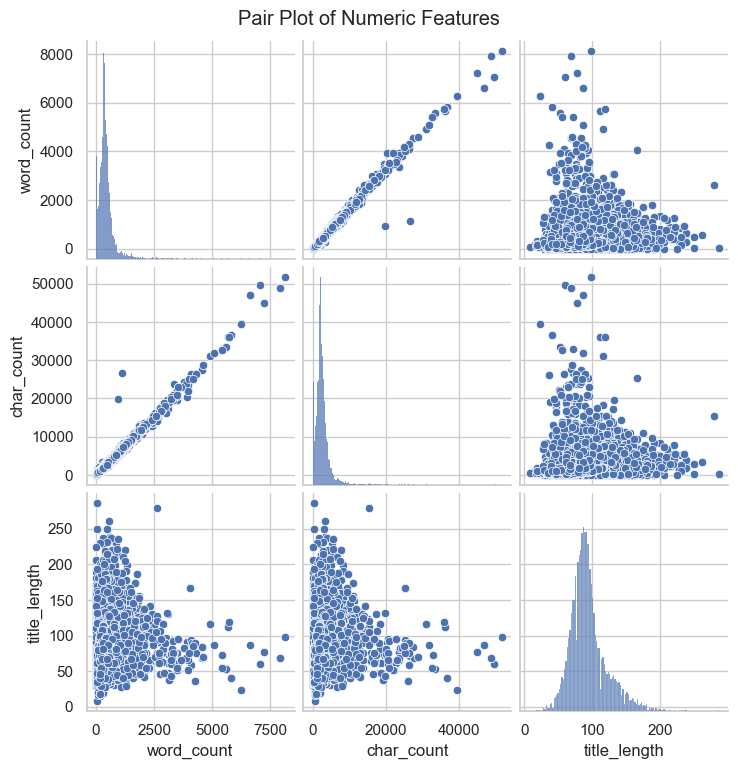

In [120]:
# Pair Plot for specific column
sns.pairplot(df[['word_count', 'char_count', 'title_length']])
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()

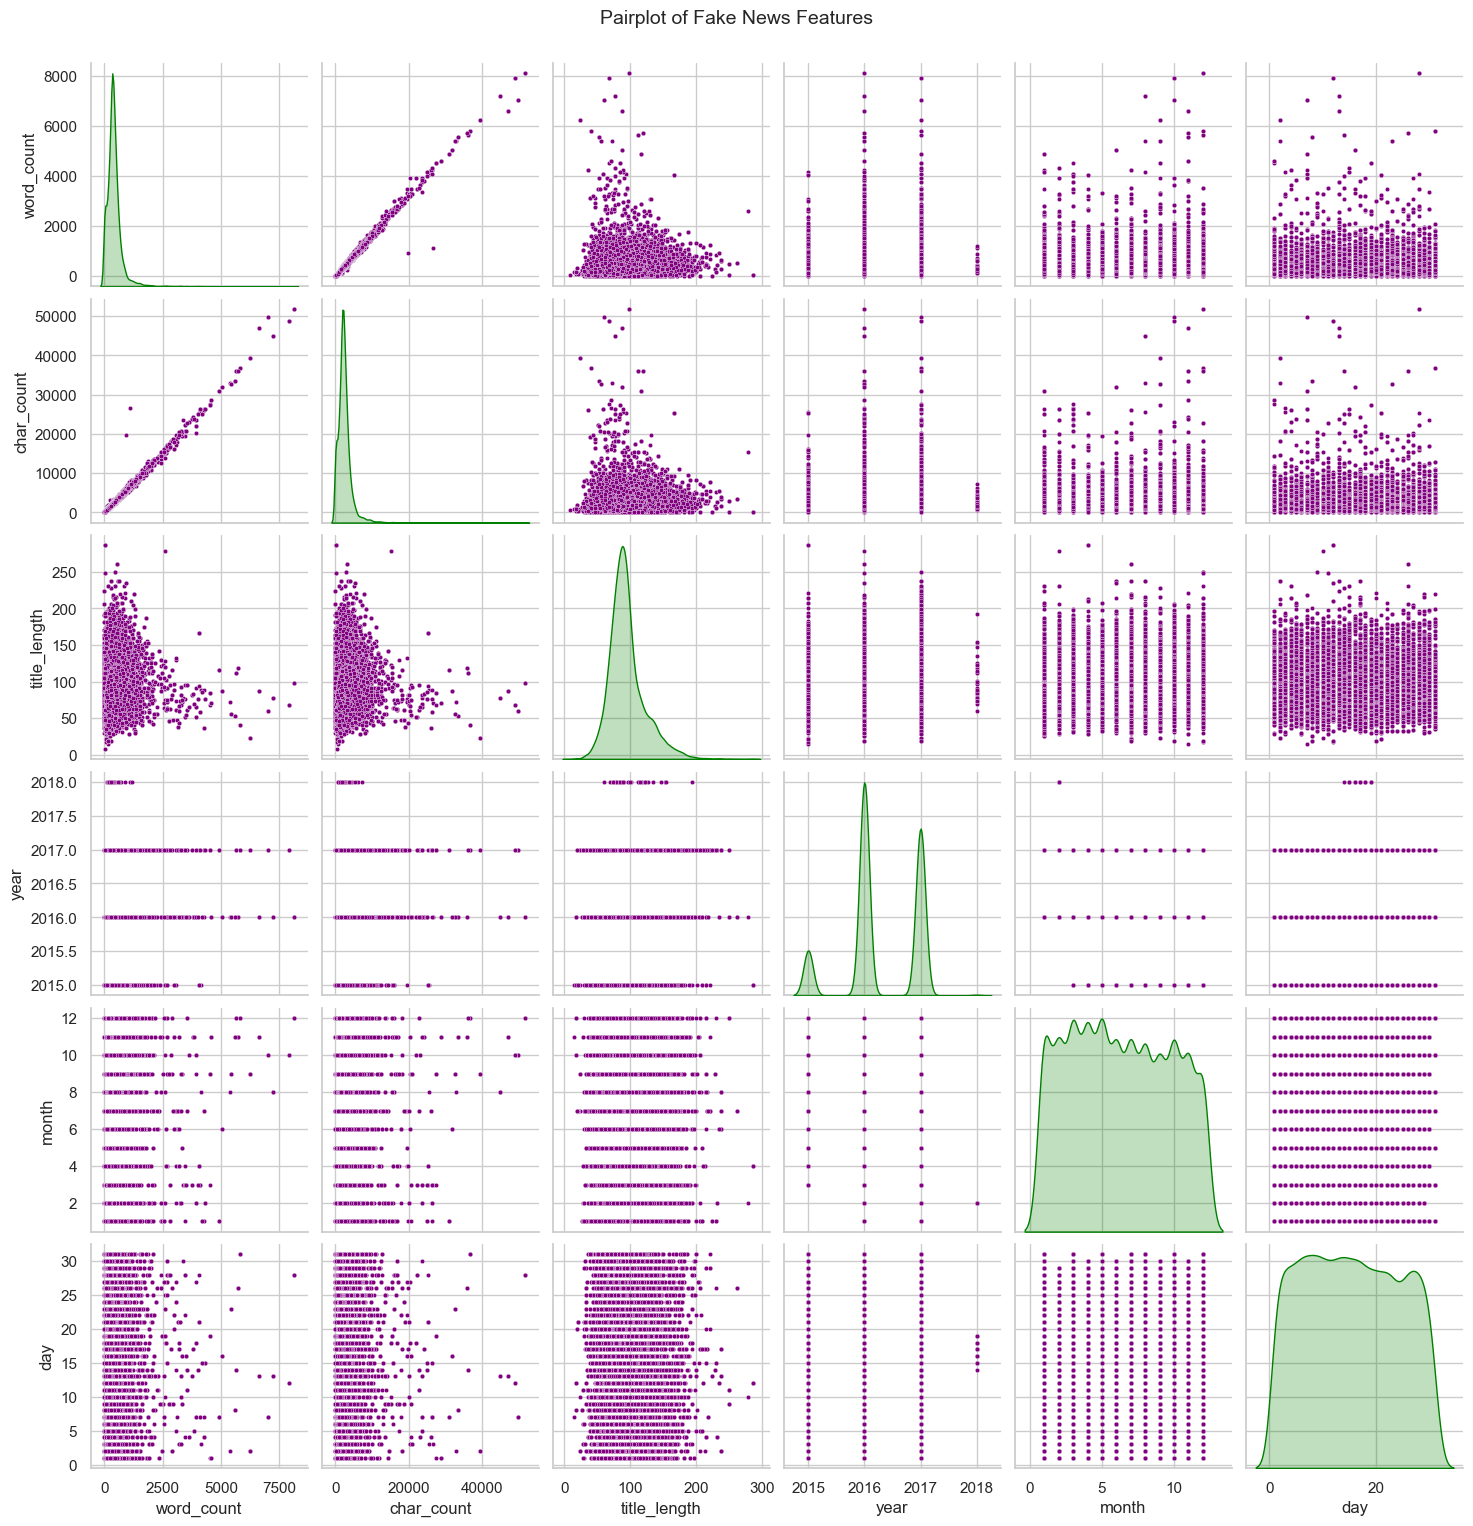

In [28]:
# Select numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Generate Pairplot with a custom color
sns.pairplot(df[numerical_features], kind="scatter", diag_kind="kde", 
             plot_kws={'s': 10, 'color': 'purple'},  # Change scatterplot color
             diag_kws={'fill': True, 'color': 'green'})  # Change diagonal KDE color

# Set the title
plt.suptitle("Pairplot of Fake News Features", fontsize=14, y=1.02)

# Show the plot
plt.show()